**Завдання:**

Застосуйте описані вище методи кластеризації на датасеті винних сортів **ICI ML Wine Data Set**. 

**1. Завантажимо дані та отримаємо розмірність цільового датафрейму.**

In [126]:
import pandas as pd
from sklearn.datasets import load_wine

df_wine = load_wine()
print("Масив даних для кластеризації: {}".format(df_wine.data.shape))

Масив даних для кластеризації: (178, 13)


**2. Зробимо графічне відображення цільового датафрейму для візуального визначиення пари найбільш відособлених ознак.**

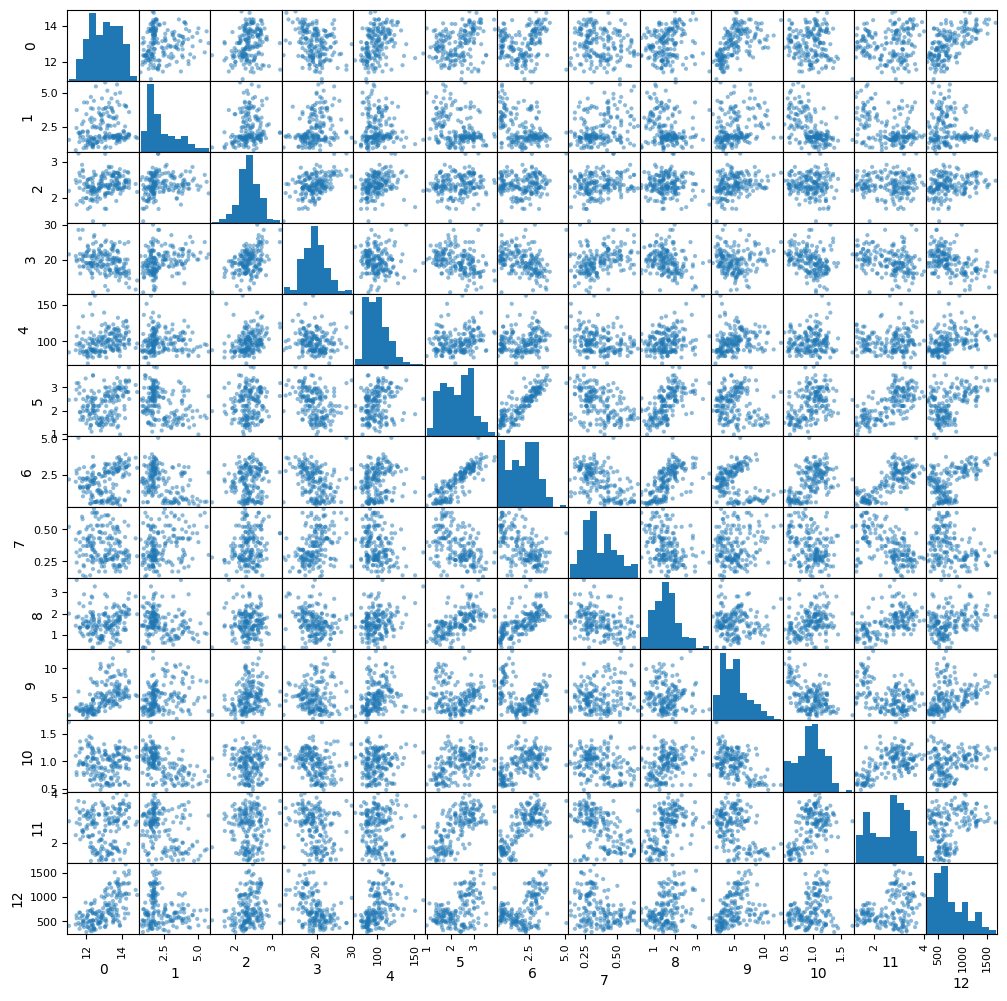

In [116]:
import matplotlib.pyplot as plt

df = pd.DataFrame(df_wine.data)
grr = pd.plotting.scatter_matrix(df, figsize=(12, 12))

**3. Оскільки візуально визначити відособлені ознаки не вдалося, застосуємо програмний метод PCA.**

In [127]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3).fit(df_wine.data)
pca_3d = pca.transform(df_wine.data)

**4. Застосуємо метод кластеризації к-середніх.**

In [128]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_wine.data)
predictions = model.predict(df_wine.data)
predictions

C:\users\админ\appdata\local\programs\python\python311\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

**5. Зробимо графічну візуалізацію отриманих кластерів по головним ознакам.**

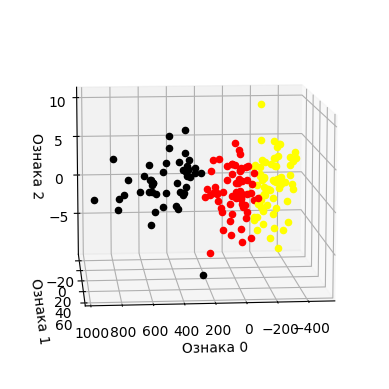

In [130]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(predictions)):
    if predictions[i] == 0:
        ax.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'red')
    elif predictions[i] == 1:
        ax.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'black')
    elif predictions[i] == 2:
        ax.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'yellow')
        
ax.set_xlabel('Ознака 0')
ax.set_ylabel('Ознака 1')
ax.set_zlabel('Ознака 2')

ax.view_init(elev=10, azim=85)

plt.show()

**6. Кластеризація на основі щільності(DBSCAN)**

In [162]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=45, min_samples=4)
dbscan.fit(df_wine.data)
print(dbscan.labels_)

[ 0  0  0  1  2  1  3  3  0  0  1  3  3  0  1  3  3  0 -1  2  2  2  0  0
  2  2  0  3  2  0  3  1  0  3  0  2  2  0  0  2  2  0  0  2  2  0  0  0
  0  3  0  3  0 -1  0  0  0  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2]


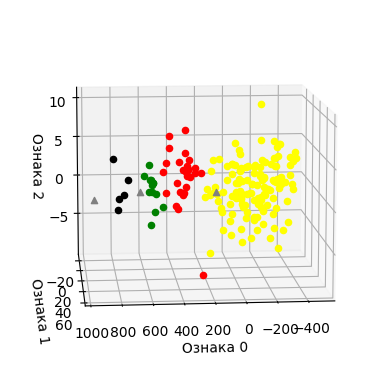

In [163]:
predictions_2 = dbscan.labels_

fig_2 = plt.figure()
ax_2 = fig_2.add_subplot(111, projection='3d')

for i in range(len(predictions_2)):
    if predictions_2[i] == 0:
        ax_2.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'red')
    elif predictions_2[i] == 1:
        ax_2.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'black')
    elif predictions_2[i] == 2:
        ax_2.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'yellow')
    elif predictions_2[i] == 3:
        ax_2.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'green')
    elif predictions_2[i] == -1:
        ax_2.scatter(pca_3d[i, 0], pca_3d[i, 1], pca_3d[i, 2], color = 'grey', marker='^')
        
ax_2.set_xlabel('Ознака 0')
ax_2.set_ylabel('Ознака 1')
ax_2.set_zlabel('Ознака 2')

ax_2.view_init(elev=10, azim=85)

plt.show()

**7. Ієрархічна кластеризація.**

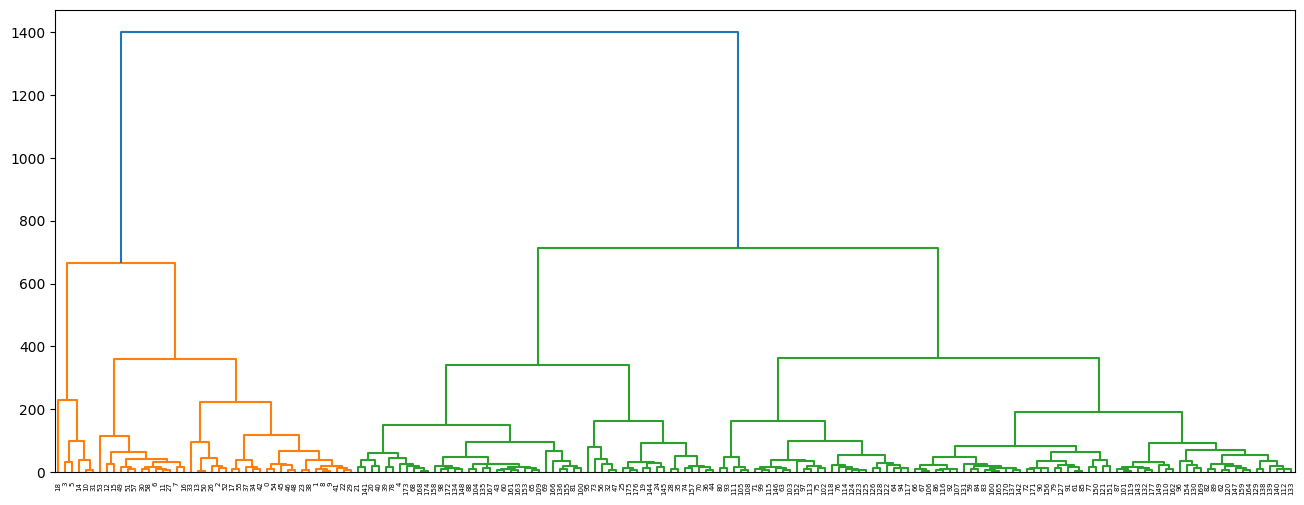

In [173]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(df_wine.data, method='complete')
fig = plt.figure(figsize=(16, 6))
dendrogram(mergings, leaf_rotation=90)
plt.show()